### Import libraries and load datasets

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [103]:
# based on what columns we deem necessary, may need to rename df/ column names
# need to choose the impt Score/ Rating/ metacritic Matrix defined to be from Beta testers (we've too many)
# standardise release_date if it's impt

userComments1 = pd.read_csv('Data Sources/Video Games/metacritic_game_user_comments (0-100k).csv')
userComments2 = pd.read_csv('Data Sources/Video Games/metacritic_game_user_comments (100-200k).csv')
userComments3 = pd.read_csv('Data Sources/Video Games/metacritic_game_user_comments (200-300k).csv')
gameInfo = pd.read_csv('Data Sources/Video Games/metacritic_game_info.csv')

ratingsAndReleaseDate = pd.read_csv('Data Sources/Video Games/updatedVGOutput.csv')
gameScore = pd.read_excel('Data Sources/Video Games/metascore-video-games-1986-2023.xlsx', sheet_name='Sheet1')
gameSales = pd.read_excel('Data Sources/Video Games/Video game sales - 2000 - 2020.xlsx', sheet_name= 'Sheet1')

C:\Users\Michael\AppData\Local\Temp\ipykernel_13016\2916819335.py:1: DtypeWarning: Columns (1,2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  userComments1 = pd.read_csv('Data Sources/Video Games/metacritic_game_user_comments (0-100k).csv')
C:\Users\Michael\AppData\Local\Temp\ipykernel_13016\2916819335.py:2: DtypeWarning: Columns (1,2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  userComments2 = pd.read_csv('Data Sources/Video Games/metacritic_game_user_comments (100-200k).csv')


In [196]:
# can join via title/name
print(f"userComments1: {userComments1.columns}\n\ngameInfo:{gameInfo.columns}\n\nratingsAndReleaseDate: {ratingsAndReleaseDate.columns}\n\ngameScore: {gameScore.columns}\n\ngameSales: {gameSales.columns}")

userComments1: Index(['Unnamed: 0', 'Title', 'Platform', 'Userscore', 'Comment', 'Username'], dtype='object')

gameInfo:Index(['Title', 'Year', 'Publisher', 'Genre', 'Platform', 'Metascore',
       'Avg_Userscore', 'No_Players'],
      dtype='object')

ratingsAndReleaseDate: Index(['name', 'platform', 'user_rating', 'critic_rating', 'release_date',
       'summary', 'description', 'metacritic'],
      dtype='object')

gameScore: Index(['no', 'name', 'platform', 'release_date', 'user_score', 'meta_score',
       'summary'],
      dtype='object')

gameSales: Index(['title', 'platform', 'genre', 'publisher', 'vg_score', 'critic_score',
       'user_score', 'total_shipped', 'aisan_sales', 'north_american_sales',
       'japan_sales', 'european_sales', 'global_sales', 'Production Cost',
       'release_year'],
      dtype='object')


In [213]:
userComments1.head()

,Unnamed: 0,Title,Platform,Userscore,Comment,Username
0,0.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I won't bore you with what everyone is already...,Kaistlin
2,2.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I'm one of those people who think that this is...,doodlerman
4,4.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,This game is the highest rated game on Metacr...,StevenA


In [214]:
gameInfo.head()

,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99.0,9.1,1 Player
1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98.0,7.4,1-2
2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98.0,7.5,1 Player
3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98.0,8.6,1-2
4,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,Xbox360,98.0,7.9,1 Player


In [215]:
ratingsAndReleaseDate.head()

,name,platform,user_rating,critic_rating,release_date,summary,description,metacritic
0,Full Throttle,PC,8.5,86,"April 30, 1995","You're Ben--beaten, framed for murder and left...","<p>One minute you&#39;re on the road, riding. ...",86.0
1,Sid Meier's Civilization II,PC,8.7,94,"February 29, 1996",An empire-building turn-based strategy game. T...,"<p>Make every critical social, economic and po...",94.0
2,Quake,PC,8.8,94,"June 22, 1996",Rage through 32 single player levels and 6 dea...,<h3>The roots</h3>\n<p>One of the classic repr...,94.0
3,Diablo,PC,8.6,94,"December 31, 1996",The kingdom of Khandaras has fallen into chaos...,"<p>Traveler, stay awhile and listen...</p>\n<p...",94.0
4,Super Mario 64,Nintendo 64,9.1,94,"September 26, 1996",Mario is super in a whole new way! Combining t...,<p>Mario is super in a whole new way! Combinin...,94.0


In [216]:
gameScore.head()

,no,name,platform,release_date,user_score,meta_score,summary
0,0,Like a Dragon: Ishin!,Xbox Series X,2023-02-18,NaN,80.0,"1860s Kyo is plagued by widespread inequality,..."
1,1,FinalFort,PC,2023-02-18,NaN,NaN,"You will be humanity's last hope, building a w..."
2,2,Like a Dragon: Ishin!,Xbox One,2023-02-18,NaN,NaN,"1860s Kyo is plagued by widespread inequality,..."
3,3,Tales of Symphonia Remastered,PlayStation 4,2023-02-17,NaN,68.0,"In a dying world, legend has it that a Chosen ..."
4,4,Tales of Symphonia Remastered,Switch,2023-02-17,NaN,68.0,"In a dying world, legend has it that a Chosen ..."


In [217]:
gameSales.head()

,title,platform,genre,publisher,vg_score,critic_score,user_score,total_shipped,aisan_sales,north_american_sales,japan_sales,european_sales,global_sales,Production Cost,release_year
0,(c 12) Final Resistance,PS,Shooter,IBM,1.0,6.5,4.0,8.0,5.08,1.10,5.70,3.54,15.42,1.98,2002
1,.hack Sekai no Mukou ni Versus,PS3,Fighting,IBM,6.0,10.0,6.0,269.0,3.00,1.86,0.03,6.43,8.35,3.34,2012
2,007 Quantum of Solace,PS2,Shooter,Activision,8.0,7.8,4.0,81.0,3.00,0.17,1.21,2.22,4.03,2.05,2008
3,007 Quantum of Solace,PS3,Shooter,Activision,3.0,6.6,10.0,158.0,1.14,0.43,0.02,0.51,2.10,1.19,2008
4,007 The World is not Enough,PS,Shooter,Electronic Arts,1.0,6.4,1.0,240.0,3.00,0.51,3.75,0.35,5.53,1.50,2000


In [137]:
def hist(df, column_name):
    plt.hist(df[column_name], bins=10, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'{column_name} Distribution')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

### userComments

In [104]:
userComments3['Unnamed: 0'] = userComments3['Unnamed: 0'].astype('float64')
userComments3['Userscore'] = userComments3['Userscore'].astype('float64')

userComments = pd.concat([userComments1, userComments2, userComments3], axis = 0)
userComments.drop(columns = 'Unnamed: 0', inplace = True)
userComments.dropna(how = 'all', inplace = True)

In [203]:
# Comments >> 23 missing entries
# Username   >> 3 missing entries
userComments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283983 entries, 0 to 83981
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Title      283983 non-null  object 
 1   Platform   283983 non-null  object 
 2   Userscore  283983 non-null  float64
 3   Comment    283960 non-null  object 
 4   Username   283980 non-null  object 
dtypes: float64(1), object(4)
memory usage: 13.0+ MB


In [105]:
userComments.describe()

,Userscore
count,283983.000000
mean,7.618308
std,3.131767
min,0.000000
25%,7.000000
50%,9.000000
75%,10.000000
max,10.000000


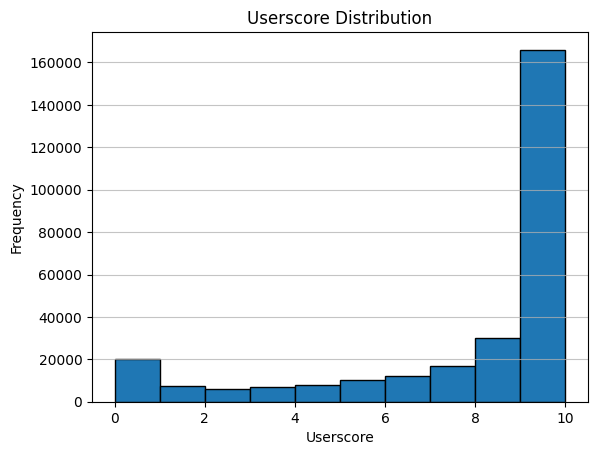

In [136]:
hist(userComments, 'Userscore')

In [127]:
userComments.head()

,Title,Platform,Userscore,Comment,Username
0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,"Everything in OoT is so near at perfection, it...",SirCaestus
1,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I won't bore you with what everyone is already...,Kaistlin
2,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I'm one of those people who think that this is...,doodlerman
4,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,This game is the highest rated game on Metacr...,StevenA


### gameInfo

In [153]:
gameInfo = pd.read_csv('Data Sources/Video Games/metacritic_game_info.csv')

In [154]:
gameInfo.drop(columns = 'Unnamed: 0', inplace = True)

In [156]:
gameInfo.loc[gameInfo.Metascore == 'not specified', 'Metascore'] = -999
gameInfo['Metascore'] = gameInfo.Metascore.astype('float64')

gameInfo.loc[gameInfo.Avg_Userscore == 'not specified', 'Avg_Userscore'] = -999
gameInfo.loc[gameInfo.Avg_Userscore == 'tbd', 'Avg_Userscore'] = -998
gameInfo['Avg_Userscore'] = gameInfo.Avg_Userscore.astype('float64')

gameInfo.loc[gameInfo.Year == 'not specified', 'Year'] = -999
gameInfo['Year'] = gameInfo.Year.astype('int64')

In [169]:
gameInfo = gameInfo[gameInfo.Year != -999] # 11 rows removed (all Metascore = -999 are removed too)
gameInfo = gameInfo[gameInfo.Avg_Userscore != -999] # 1 row removed

gameInfo[gameInfo.Avg_Userscore == -998].shape # 75 rows .. keep? not sure if this col is impt

(75, 8)

In [141]:
# No_Players >> 52 categories .. combine them??

gameInfo..value_counts().shape
# gameInfo.No_Players.value_counts()

(52,)

In [170]:
# No_Players .. 7 missing entries

gameInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4988 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          4988 non-null   object 
 1   Year           4988 non-null   int64  
 2   Publisher      4988 non-null   object 
 3   Genre          4988 non-null   object 
 4   Platform       4988 non-null   object 
 5   Metascore      4988 non-null   float64
 6   Avg_Userscore  4988 non-null   float64
 7   No_Players     4981 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 350.7+ KB


In [172]:
gameInfo.Metascore.describe()

count    4988.000000
mean       83.123697
std         4.342992
min        77.000000
25%        80.000000
50%        82.000000
75%        86.000000
max        99.000000
Name: Metascore, dtype: float64

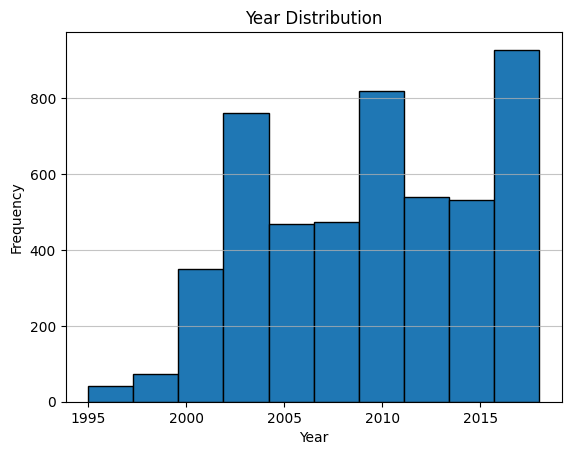

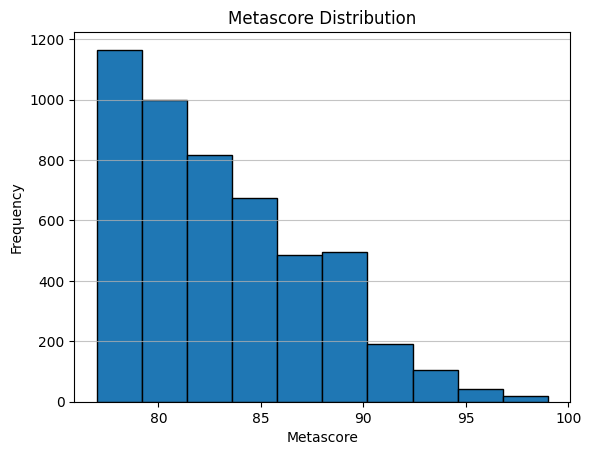

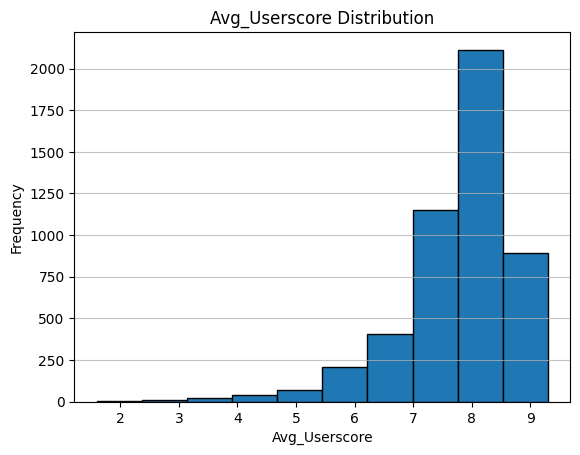

In [176]:
for x in gameInfo.select_dtypes(include=['Int64', 'float64']):
    if x == 'Avg_Userscore':
        test = gameInfo[gameInfo[x] != -998]
        hist(test, x)
    else:
        hist(gameInfo, x)

In [174]:
gameInfo.head()

,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99.0,9.1,1 Player
1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98.0,7.4,1-2
2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98.0,7.5,1 Player
3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98.0,8.6,1-2
4,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,Xbox360,98.0,7.9,1 Player
